In [1]:
import os
import torch
torch.manual_seed(int(1e9+7e7+17))
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
# %matplotlib widget
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger
from torch.utils.data import random_split
from ilt_data import PNGFolderDataset, tensor_to_image
from ilt_model import DualLithoZernikeRegressor
# torch.multiprocessing.set_start_method('spawn')
# import warnings
# warnings.filterwarnings('ignore', category=UserWarning, message='Torchinductor does not support code generation for complex operators. Performance may be worse than eager.')

In [2]:
DATASET_ROOT = os.path.join('..', 'dataset', 'train_layouts')
workers = 24
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# torch.zeros((1,), device=device)

In [3]:
# -------- 3. DataLoader --------
def make_dataloaders(root, batch_size=16, num_zernike=20, split=0.8, workers=1):
    dataset = PNGFolderDataset(root, N_zernike=num_zernike, image_size=1024, aberr_max=3., device=device)
    train_size = int(split * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=workers)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=workers)
    return train_loader, val_loader, dataset

## Train

Aberrations: Z=[ 1.6828673  2.3244605  0.9431777  2.332347   2.0393734 -2.7606764]


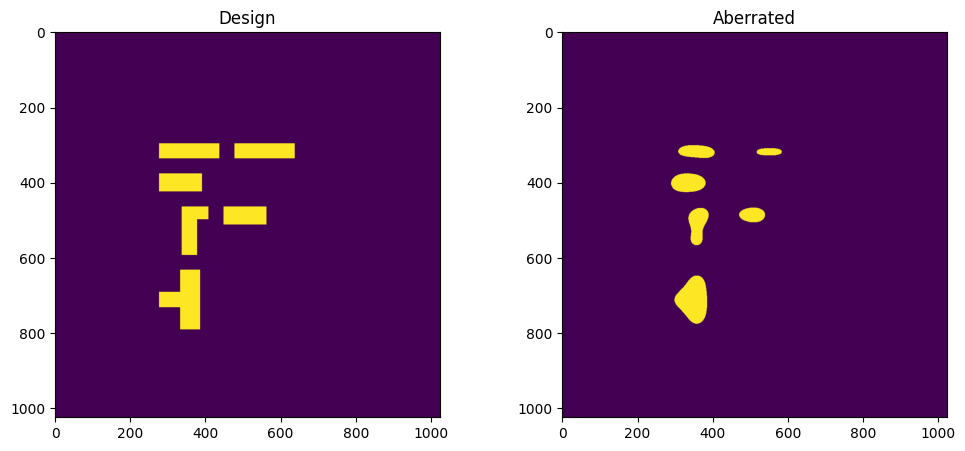

In [4]:
train_loader, val_loader, dataset = make_dataloaders(DATASET_ROOT, batch_size=1, num_zernike=6, workers=0)
a = next(iter(train_loader))
i = 0

fig = plt.figure(figsize=(12,5))
ax = plt.subplot(1,2,1)
plt.imshow(dataset.intensity_tensor_to_image(a[0][i][0]))
ax.set_title("Design")
ax = plt.subplot(1,2,2)
plt.imshow(dataset.intensity_tensor_to_image(a[0][i][1]))
ax.set_title("Aberrated")
print(f"Aberrations: Z={a[1][i].cpu().numpy()}")
plt.show()

In [5]:
# -------- 4. Training --------
"mobilenet_v3_small" # 1.5 M / 1.06 m
"mobilenet_v3_large" # 4.2 M / 1.13 m
"efficientnet_b0"    # 4.0 M / 1.45 m
train_loader, val_loader, dataset = make_dataloaders(DATASET_ROOT, batch_size=18, num_zernike=6, workers=0)
model = DualLithoZernikeRegressor("mobilenet_v3_large", num_zernike=6, lr=1e-3)
checkpoint_callback = ModelCheckpoint(
    monitor='val_loss',
    save_top_k=1,
    mode='min',
    filename='best-model'
)
logger = TensorBoardLogger(".", name="lightning_logs")

trainer = Trainer(max_epochs=50, accelerator="auto", callbacks=[checkpoint_callback],
                  accumulate_grad_batches = 16, gradient_clip_val=1.,
                  logger=logger,
                  precision="16-mixed"
          )
trainer.fit(model, train_loader, val_loader)

/home/vvkakurin/.conda/envs/SK/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/vvkakurin/.conda/envs/SK/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type        | Params | Mode 
-------------------------------------------------
0 | sim      | LTSim

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/vvkakurin/.conda/envs/SK/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=21` in the `DataLoader` to improve performance.
/home/vvkakurin/.conda/envs/SK/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=21` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


In [6]:
final_val_loss = trainer.callback_metrics['val_loss'].item()
print('Final validation loss:', final_val_loss)

Final validation loss: 0.015557322651147842


In [7]:
# assert False

## Test

In [8]:
batch = next(iter(val_loader))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
imgs, z_true = batch
imgs, z_true = imgs[:8].to(device), z_true[:8].to(device)

In [9]:
##### CLEAR CACHE #####
# model.cpu()
# from gc import collect
# imgs, z_true = None, None
# litho_imgs, aberr_imgs, restored_imgs = None, None, None
# z_preds = None
# batch = None
# collect()
# torch.cuda.empty_cache()
# collect()

In [10]:
model.to(device)
litho_aberr_imgs = imgs[:, 1:]
z_preds, z_rev_preds = model(litho_aberr_imgs)
print(z_preds[0], z_true[0], z_rev_preds[0], sep='\n')

tensor([-0.0042,  0.5880, -2.3767,  2.2793, -2.7530,  1.1251], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor([ 0.1672,  0.3438, -2.5977,  2.1244, -2.5147,  0.8980], device='cuda:0')
tensor([-0.0615, -0.5913,  1.6553,  0.1615, -0.2392, -0.1094], device='cuda:0',
       grad_fn=<SelectBackward0>)


In [11]:
design_imgs, litho_imgs, aberr_imgs = torch.split(imgs, 1, dim=1) # [B, 3, H, W] -> [B, (1, 1, 1), H, W]
with torch.autocast(device_type=device.type):
    modelled_imgs = model.sim.run_lithosim(design_imgs, zernike_coeffs=z_preds)
    reconstructed_imgs = model.sim.run_lithosim(aberr_imgs, zernike_coeffs=z_rev_preds)

Aberrations: Z=[ 0.16720355  0.34384346 -2.5976639   2.1244264  -2.5147393   0.89795065] Preds=[-0.00423275  0.5879757  -2.3767037   2.2792647  -2.752954    1.1250936 ] Inverse=[-0.06150904 -0.591295    1.6552781   0.161496   -0.23922504 -0.10942461]


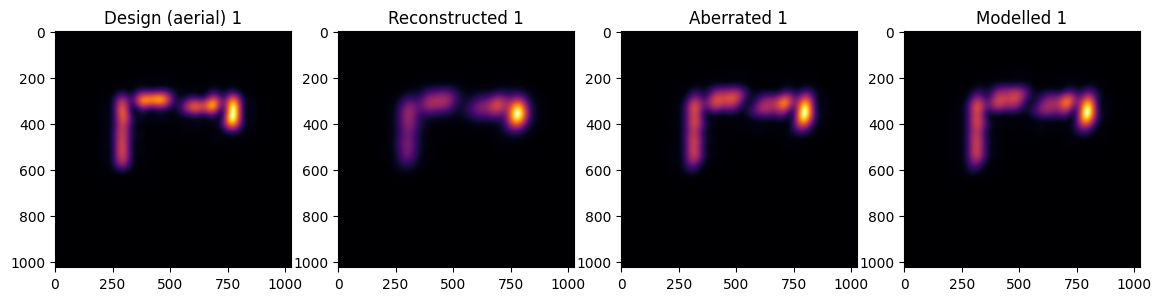

Aberrations: Z=[ 0.99477303  0.06450784  1.7865204  -2.408044   -0.35684645 -2.5396585 ] Preds=[-0.33135614  0.17497233  1.7930629  -1.017648   -2.6736734  -0.8501258 ] Inverse=[ 0.14054234  0.09429783 -0.9388415  -0.00850708  0.21026315 -0.15558633]


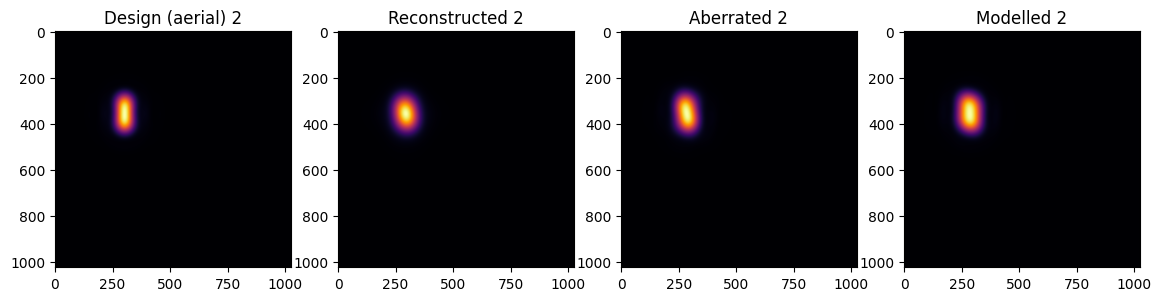

Aberrations: Z=[-2.6635196  -0.51691586 -1.7766414  -2.7350492  -0.45621926  0.3483081 ] Preds=[-0.09038271 -0.29335997 -1.5738955  -1.5401776  -1.1449447   0.510192  ] Inverse=[-0.03844619  0.16520438  1.1950353   0.04992701 -0.0405831  -0.18575522]


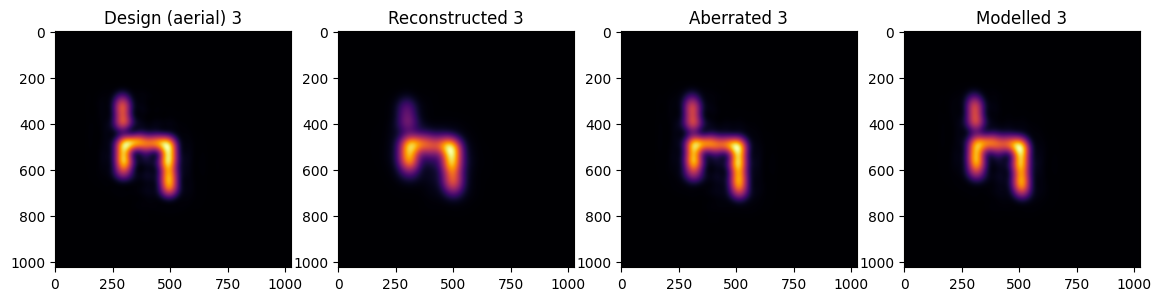

Aberrations: Z=[-0.5598049  -2.3419497   1.6193283  -1.7752178   0.93770385 -2.7974458 ] Preds=[-0.23490074 -2.355973    1.5172557   0.6575803  -2.739851    0.98028815] Inverse=[ 0.12202358  1.8176807  -0.77283543 -0.00721955  0.28666478 -0.23115961]


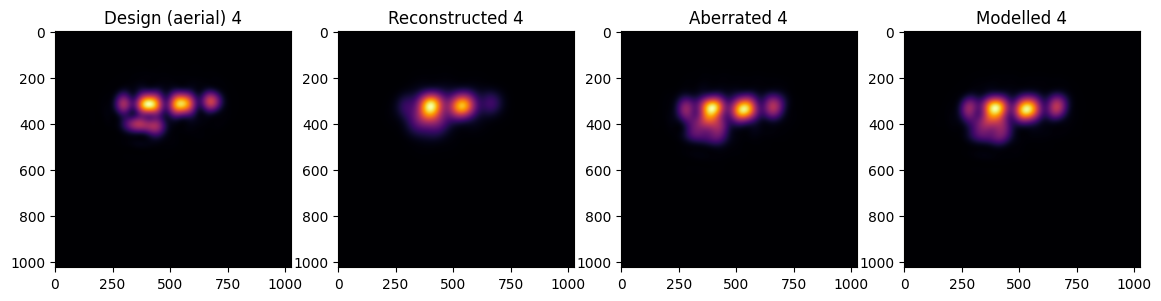

Aberrations: Z=[ 2.4877245  -1.6128268   1.6883876  -1.330856    0.4147582   0.09704196] Preds=[-0.25371525 -1.6642704   1.6660794   0.72376686 -1.0237598  -0.04766333] Inverse=[ 0.11153434  1.2923647  -1.068976   -0.02885351  0.20259063 -0.00883614]


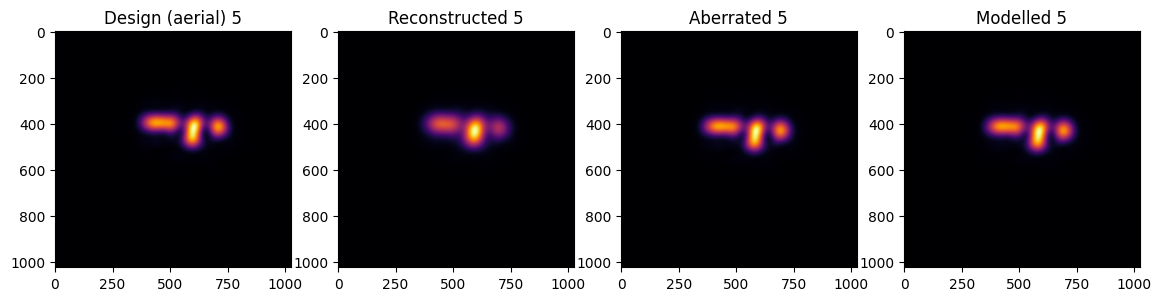

Aberrations: Z=[ 1.6057788   2.1671681  -0.85653627  0.90621364 -1.9805622  -2.6367135 ] Preds=[-0.32256752  2.3824065  -0.59830356  0.59243125 -2.7935073  -1.9338071 ] Inverse=[ 0.10429192 -1.5392255   0.45708686  0.08465967 -0.26896238 -0.06553458]


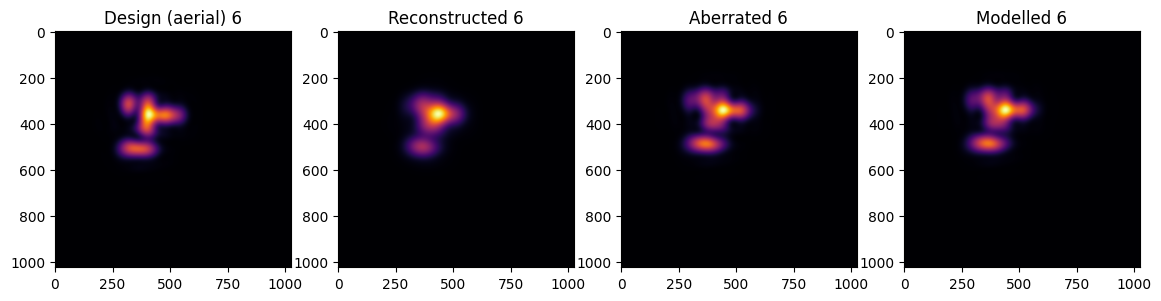

Aberrations: Z=[ 0.3335935   2.6762357  -0.29174602 -0.72927994 -0.4309913  -0.39106268] Preds=[-0.14036508  2.670439   -0.1956437  -0.3480845  -1.1363169  -0.09231107] Inverse=[-0.0181048  -1.9043125   0.43117374  0.00748996 -0.13523002 -0.16548963]


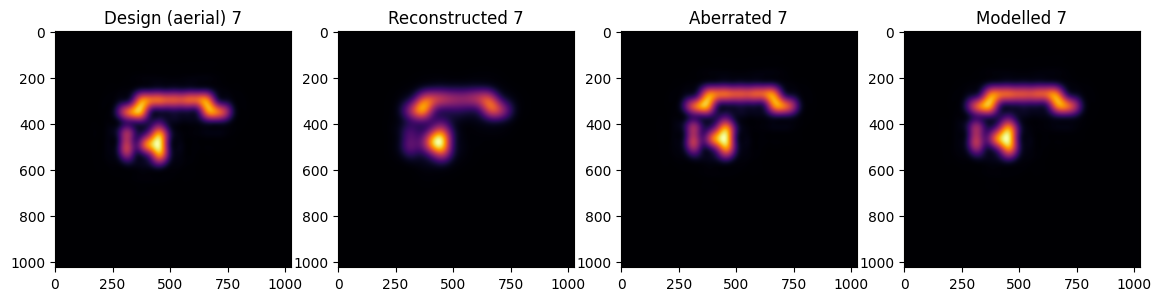

Aberrations: Z=[-2.6226714 -1.4086967 -2.5327206 -1.965111   1.7352294  2.2331395] Preds=[-0.3519464 -1.3110048 -2.2643082  1.1304259 -2.5314782 -1.8329284] Inverse=[ 0.2867101   0.8056561   1.6046826   0.04391778 -0.06029842  0.14582394]


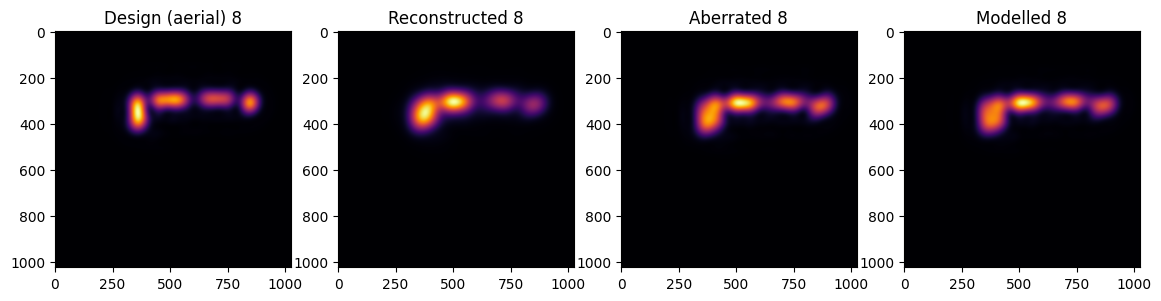

In [12]:
# z = z_preds[:1].clone()
# z_rev = z_rev_preds[:1].clone()
# # z[0,-2] = 1.
# # litho = litho_imgs[:1]
# with torch.autocast(device_type=device.type):
#     aberr = model.sim.run_lithosim(design_imgs[:1], zernike_coeffs=z)
#     reconstr = model.sim.run_lithosim(aberr_imgs[:1], zernike_coeffs=z_rev)
    
# fig = plt.figure(figsize=(14,4))
# ax = plt.subplot(2,3,1)
# # plt.imshow(dataset.intensity_tensor_to_image(litho[0]))
# # # ax.set_title(f"Design {i+1}")
# # ax = plt.subplot(1,2,2)
# # plt.imshow(dataset.intensity_tensor_to_image(aberr[0]))
# plt.imshow(tensor_to_image(litho_imgs[0]))
# # ax.set_title(f"Design {i+1}")
# ax = plt.subplot(1,2,2)
# plt.imshow(tensor_to_image(aberr[0]))
# # ax.set_title(f"Aberrated {i+1}")
# print(z_preds[:1])

for i in range(imgs.shape[0]):

    fig = plt.figure(figsize=(14,4))
    ax = plt.subplot(1,4,1)
    plt.imshow(tensor_to_image(litho_imgs[i]), cmap='inferno')
    ax.set_title(f"Design (aerial) {i+1}")
    ax = plt.subplot(1,4,2)
    plt.imshow(tensor_to_image(reconstructed_imgs[i]), cmap='inferno')
    ax.set_title(f"Reconstructed {i+1}")
    ax = plt.subplot(1,4,3)
    plt.imshow(tensor_to_image(aberr_imgs[i]), cmap='inferno')
    ax.set_title(f"Aberrated {i+1}")
    ax = plt.subplot(1,4,4)
    plt.imshow(tensor_to_image(modelled_imgs[i]), cmap='inferno')
    ax.set_title(f"Modelled {i+1}")
    print(f"Aberrations: Z={z_true[i].cpu().numpy()}", 
          f"Preds={z_preds[i].detach().cpu().numpy()}", 
          f"Inverse={z_rev_preds[i].detach().cpu().numpy()}")
    plt.show()

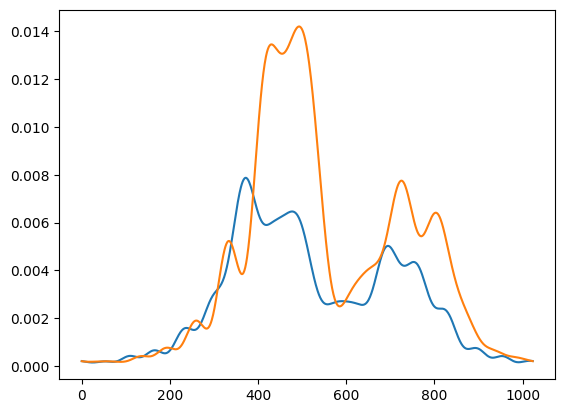

In [13]:
plt.plot(tensor_to_image(litho_imgs[0])[220])
plt.plot(tensor_to_image(aberr_imgs[0])[220])

Aberrations: Z=[ 0.16720355  0.34384346 -2.5976639   2.1244264  -2.5147393   0.89795065]
Preds=[-0.00423275  0.5879757  -2.3767037   2.2792647  -2.752954    1.1250936 ]


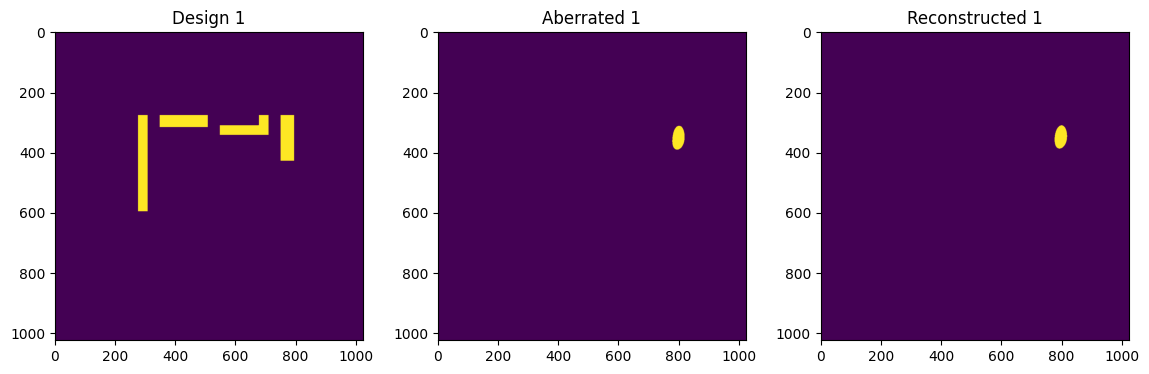

Aberrations: Z=[ 0.99477303  0.06450784  1.7865204  -2.408044   -0.35684645 -2.5396585 ]
Preds=[-0.33135614  0.17497233  1.7930629  -1.017648   -2.6736734  -0.8501258 ]


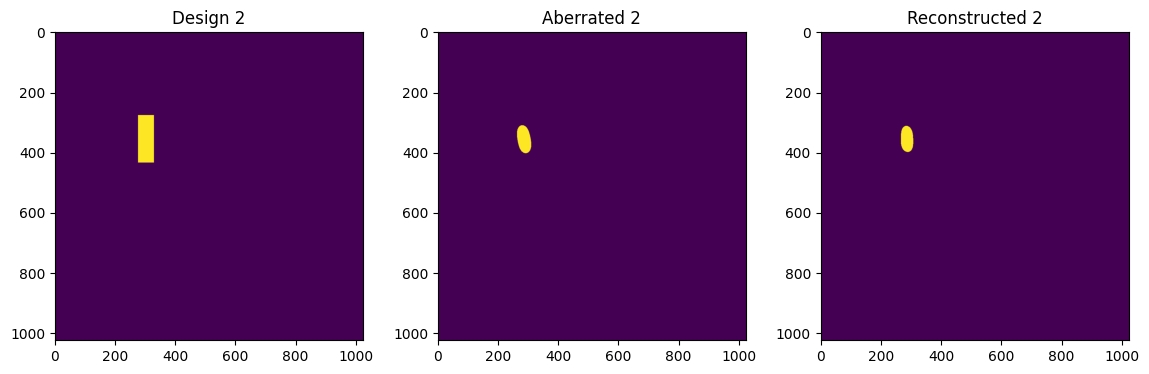

Aberrations: Z=[-2.6635196  -0.51691586 -1.7766414  -2.7350492  -0.45621926  0.3483081 ]
Preds=[-0.09038271 -0.29335997 -1.5738955  -1.5401776  -1.1449447   0.510192  ]


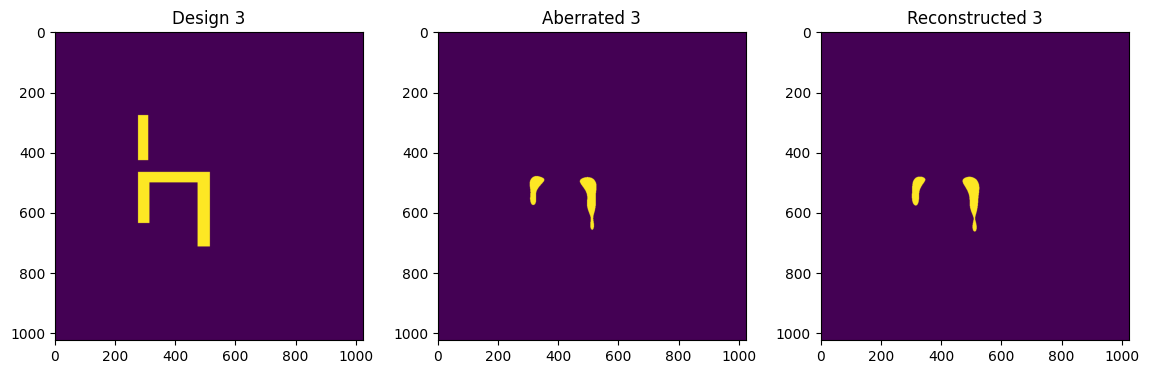

Aberrations: Z=[-0.5598049  -2.3419497   1.6193283  -1.7752178   0.93770385 -2.7974458 ]
Preds=[-0.23490074 -2.355973    1.5172557   0.6575803  -2.739851    0.98028815]


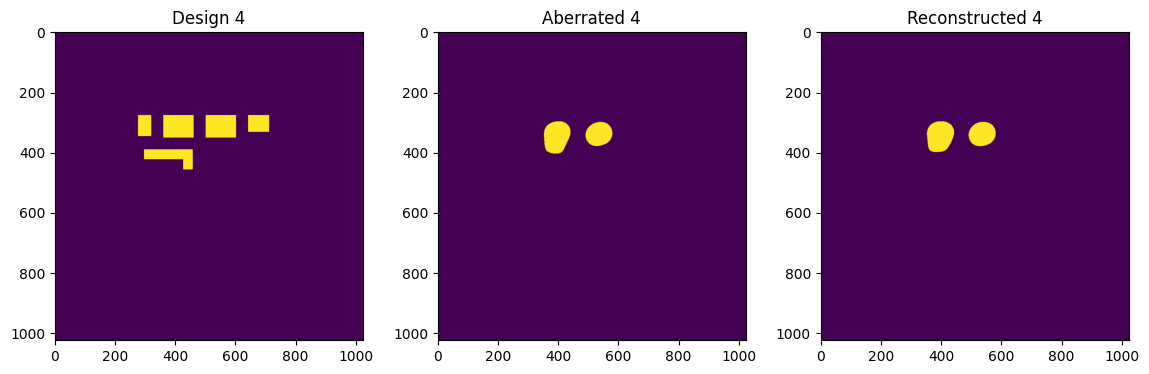

Aberrations: Z=[ 2.4877245  -1.6128268   1.6883876  -1.330856    0.4147582   0.09704196]
Preds=[-0.25371525 -1.6642704   1.6660794   0.72376686 -1.0237598  -0.04766333]


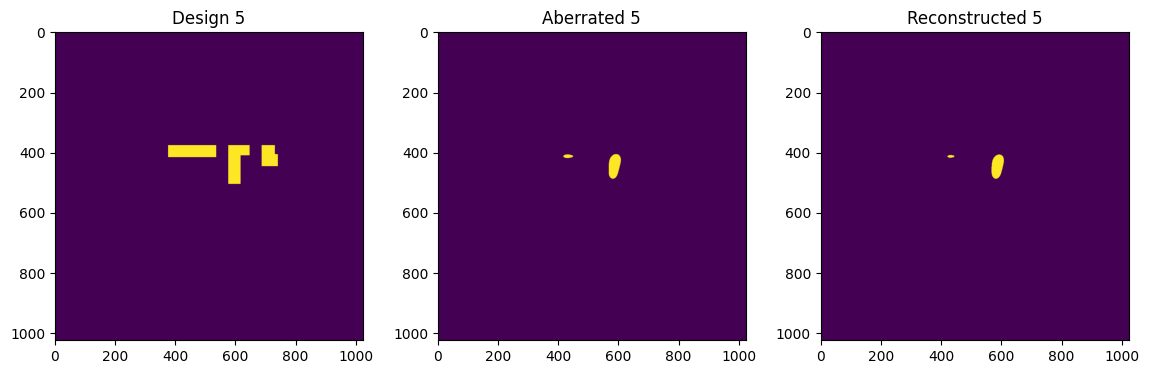

Aberrations: Z=[ 1.6057788   2.1671681  -0.85653627  0.90621364 -1.9805622  -2.6367135 ]
Preds=[-0.32256752  2.3824065  -0.59830356  0.59243125 -2.7935073  -1.9338071 ]


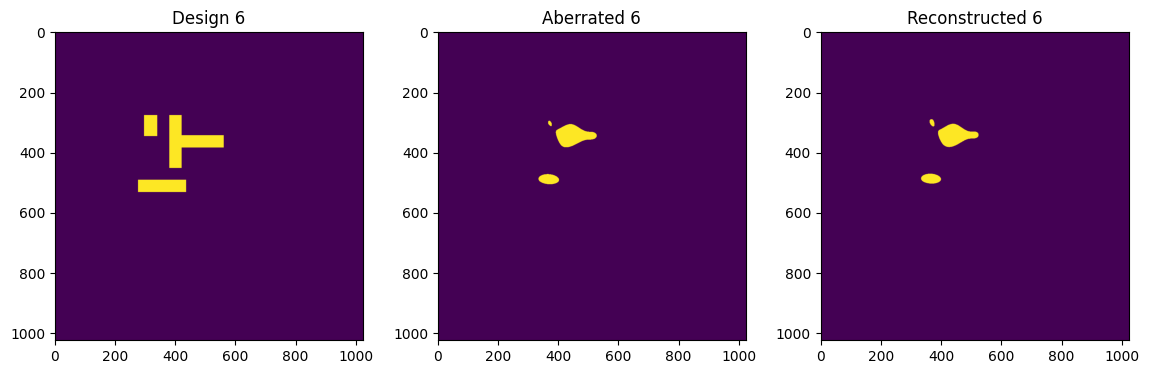

Aberrations: Z=[ 0.3335935   2.6762357  -0.29174602 -0.72927994 -0.4309913  -0.39106268]
Preds=[-0.14036508  2.670439   -0.1956437  -0.3480845  -1.1363169  -0.09231107]


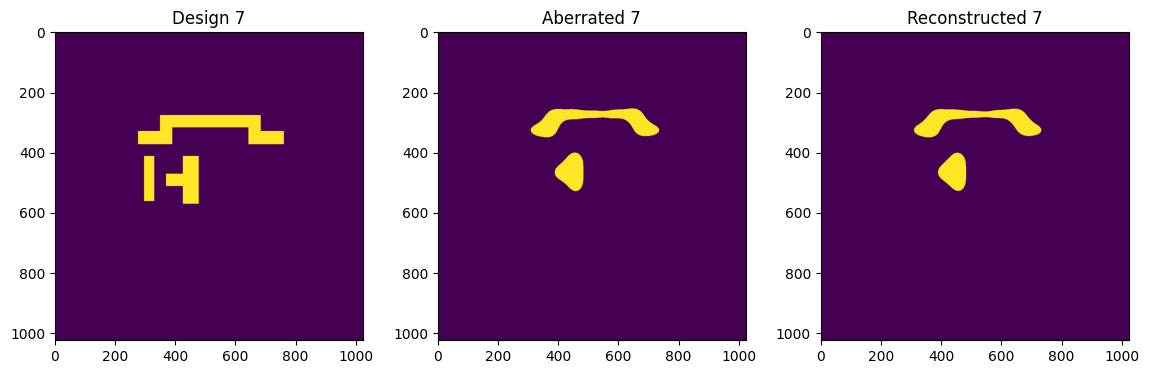

Aberrations: Z=[-2.6226714 -1.4086967 -2.5327206 -1.965111   1.7352294  2.2331395]
Preds=[-0.3519464 -1.3110048 -2.2643082  1.1304259 -2.5314782 -1.8329284]


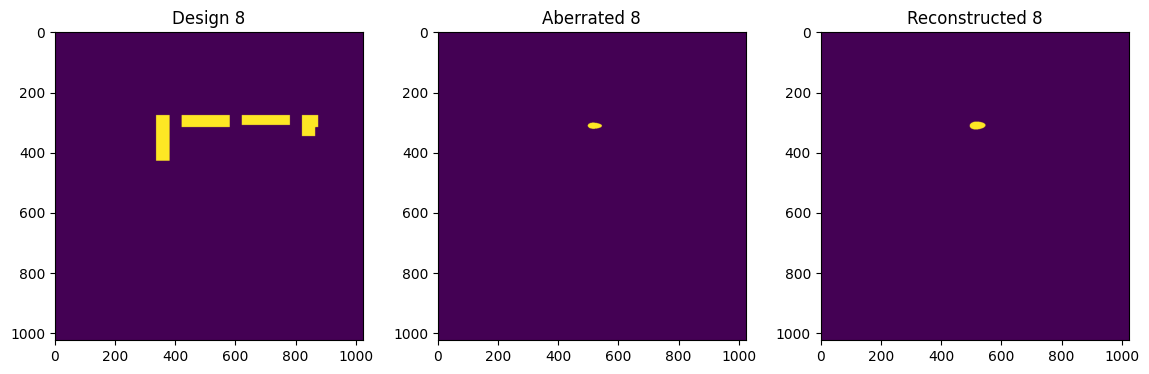

In [14]:
# i = 1
for i in range(imgs.shape[0]):

    fig = plt.figure(figsize=(14,4))
    ax = plt.subplot(1,3,1)
    plt.imshow(dataset.intensity_tensor_to_image(design_imgs[i]))
    ax.set_title(f"Design {i+1}")
    ax = plt.subplot(1,3,2)
    plt.imshow(dataset.intensity_tensor_to_image(aberr_imgs[i]))
    ax.set_title(f"Aberrated {i+1}")
    ax = plt.subplot(1,3,3)
    plt.imshow(dataset.intensity_tensor_to_image(modelled_imgs[i]))
    ax.set_title(f"Reconstructed {i+1}")
    print(f"Aberrations: Z={z_true[i].cpu().numpy()}\nPreds={z_preds[i].detach().cpu().numpy()}")
    plt.show()

In [15]:
# loss = model.loss_func(restored_imgs, litho_imgs) * 1e4
modelling_loss = model.loss_func(modelled_imgs, aberr_imgs)
reconstruction_loss = model.loss_func(reconstructed_imgs, litho_imgs)
modelling_loss, reconstruction_loss

(tensor(0.0005, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.0084, device='cuda:0', grad_fn=<MeanBackward0>))

Aberrations: Z=[ 0.16720355  0.34384346 -2.5976639   2.1244264  -2.5147393   0.89795065]
Preds=[-0.00423275  0.5879757  -2.3767037   2.2792647  -2.752954    1.1250936 ]
Inverse=[-0.06150904 -0.591295    1.6552781   0.161496   -0.23922504 -0.10942461]


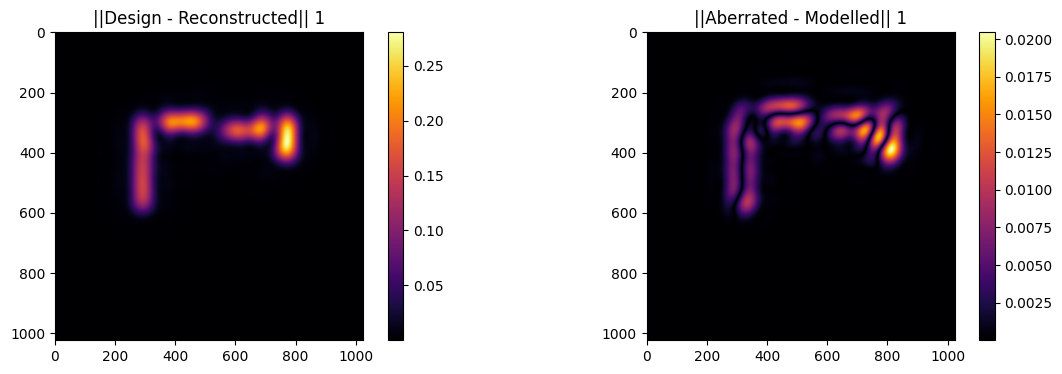

Aberrations: Z=[ 0.99477303  0.06450784  1.7865204  -2.408044   -0.35684645 -2.5396585 ]
Preds=[-0.33135614  0.17497233  1.7930629  -1.017648   -2.6736734  -0.8501258 ]
Inverse=[ 0.14054234  0.09429783 -0.9388415  -0.00850708  0.21026315 -0.15558633]


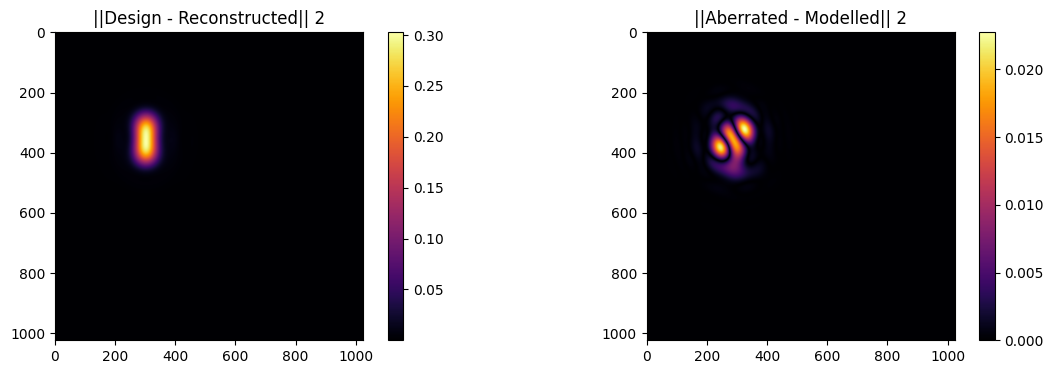

Aberrations: Z=[-2.6635196  -0.51691586 -1.7766414  -2.7350492  -0.45621926  0.3483081 ]
Preds=[-0.09038271 -0.29335997 -1.5738955  -1.5401776  -1.1449447   0.510192  ]
Inverse=[-0.03844619  0.16520438  1.1950353   0.04992701 -0.0405831  -0.18575522]


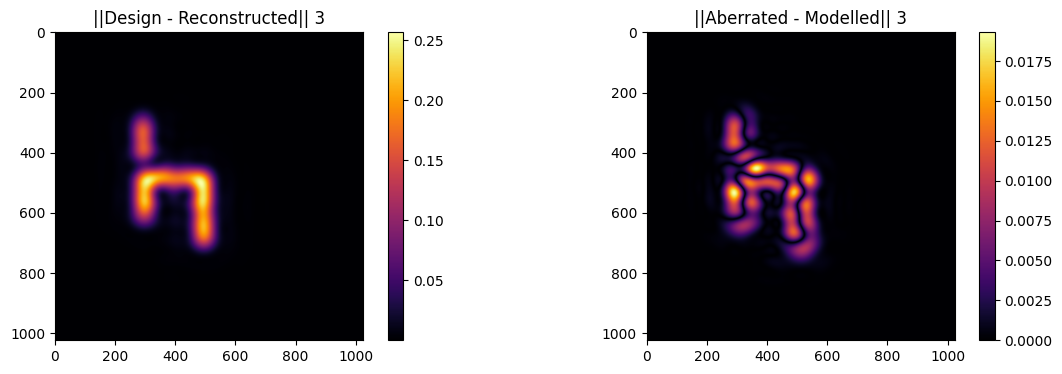

Aberrations: Z=[-0.5598049  -2.3419497   1.6193283  -1.7752178   0.93770385 -2.7974458 ]
Preds=[-0.23490074 -2.355973    1.5172557   0.6575803  -2.739851    0.98028815]
Inverse=[ 0.12202358  1.8176807  -0.77283543 -0.00721955  0.28666478 -0.23115961]


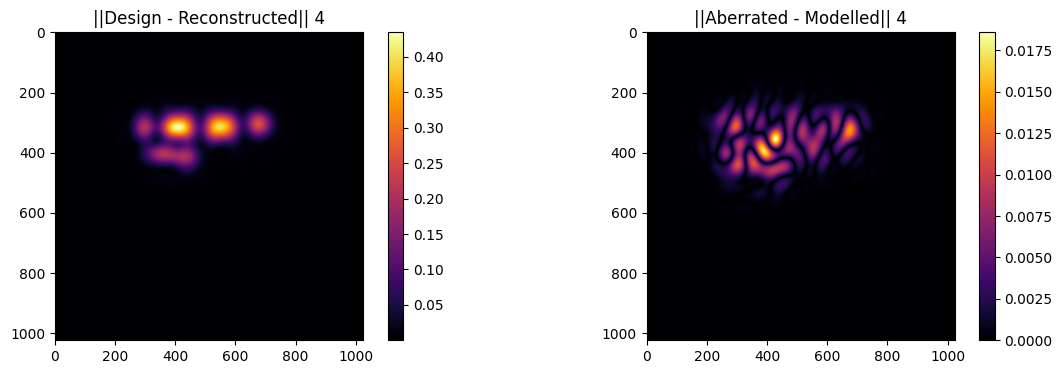

Aberrations: Z=[ 2.4877245  -1.6128268   1.6883876  -1.330856    0.4147582   0.09704196]
Preds=[-0.25371525 -1.6642704   1.6660794   0.72376686 -1.0237598  -0.04766333]
Inverse=[ 0.11153434  1.2923647  -1.068976   -0.02885351  0.20259063 -0.00883614]


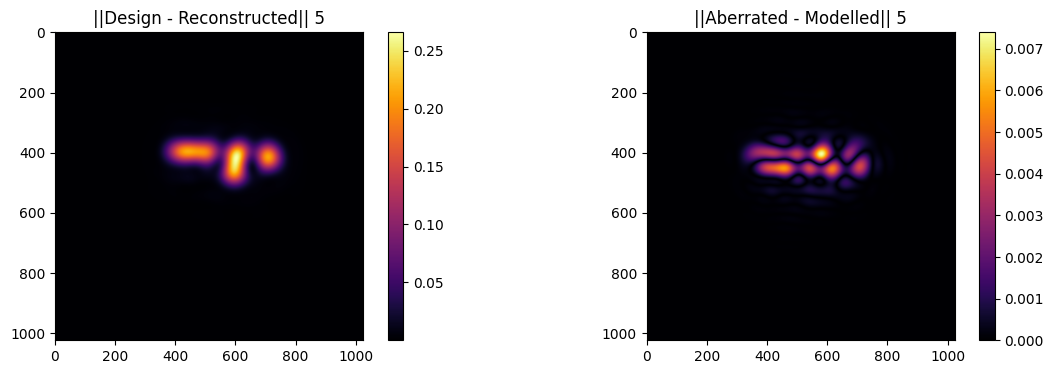

Aberrations: Z=[ 1.6057788   2.1671681  -0.85653627  0.90621364 -1.9805622  -2.6367135 ]
Preds=[-0.32256752  2.3824065  -0.59830356  0.59243125 -2.7935073  -1.9338071 ]
Inverse=[ 0.10429192 -1.5392255   0.45708686  0.08465967 -0.26896238 -0.06553458]


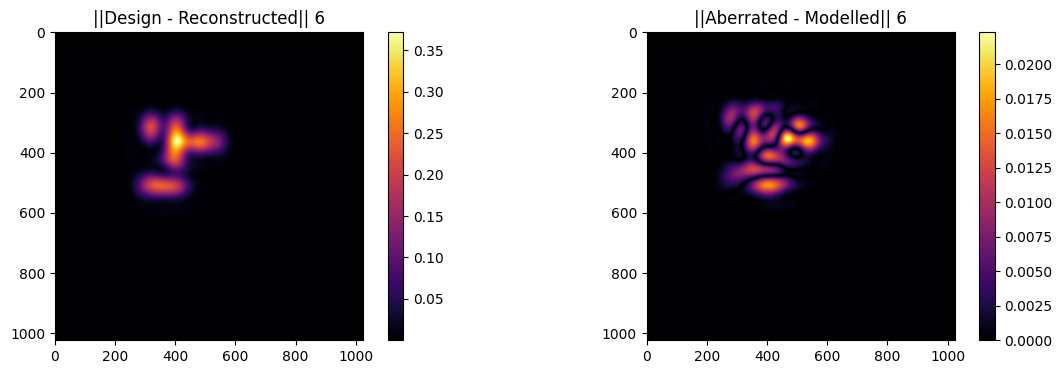

Aberrations: Z=[ 0.3335935   2.6762357  -0.29174602 -0.72927994 -0.4309913  -0.39106268]
Preds=[-0.14036508  2.670439   -0.1956437  -0.3480845  -1.1363169  -0.09231107]
Inverse=[-0.0181048  -1.9043125   0.43117374  0.00748996 -0.13523002 -0.16548963]


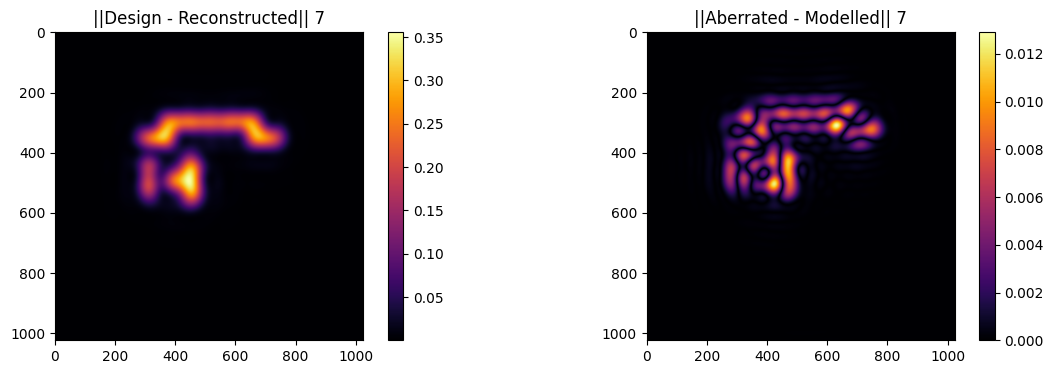

Aberrations: Z=[-2.6226714 -1.4086967 -2.5327206 -1.965111   1.7352294  2.2331395]
Preds=[-0.3519464 -1.3110048 -2.2643082  1.1304259 -2.5314782 -1.8329284]
Inverse=[ 0.2867101   0.8056561   1.6046826   0.04391778 -0.06029842  0.14582394]


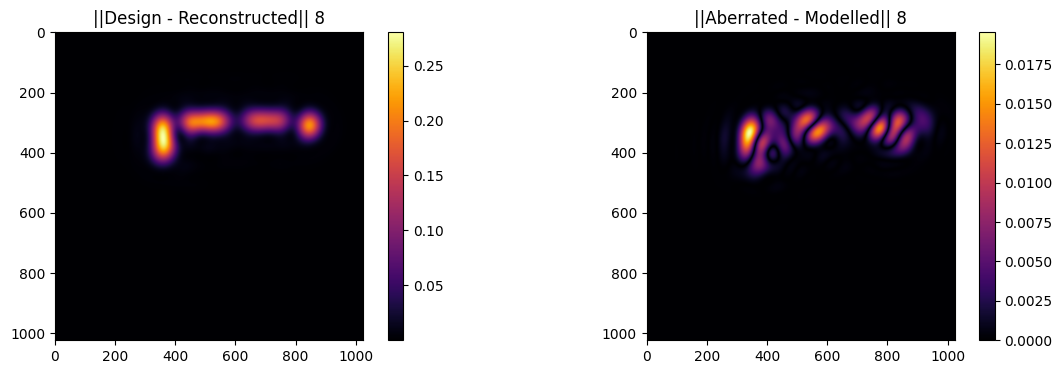

In [16]:
for i in range(imgs.shape[0]):

    fig = plt.figure(figsize=(14,4))
    ax = plt.subplot(1,2,1)
    plt.imshow(tensor_to_image(torch.abs(litho_imgs[i] - reconstructed_imgs[i])), cmap='inferno')
    plt.colorbar()
    ax.set_title(f"||Design - Reconstructed|| {i+1}")
    ax = plt.subplot(1,2,2)
    plt.imshow(tensor_to_image(torch.abs(aberr_imgs[i] - modelled_imgs[i])), cmap='inferno')
    plt.colorbar()
    ax.set_title(f"||Aberrated - Modelled|| {i+1}")
    print(f"Aberrations: Z={z_true[i].cpu().numpy()}", 
          f"Preds={z_preds[i].detach().cpu().numpy()}", 
          f"Inverse={z_rev_preds[i].detach().cpu().numpy()}", sep='\n')
    plt.show()

In [17]:
# Получить финальный val_loss
final_val_loss = trainer.callback_metrics['val_loss'].item()
print('Final validation loss:', final_val_loss)

# Где лежит best checkpoint
print('Best model saved at:', checkpoint_callback.best_model_path)

# Сохранить вручную
torch.save(model.state_dict(), 'final_dual_model MobileNetV3 1024.pt')

Final validation loss: 0.015557322651147842
Best model saved at: ./lightning_logs/version_5/checkpoints/best-model.ckpt


## Inference

In [4]:
from torchvision import transforms
import lithosim_cuda as litho
from fnmatch import fnmatch
from lt_simulator import LTSimulator

class SignleSampler:
    def __init__(self, root, N_zernike: int = 6, transform=None):
        self.N_zernike = N_zernike
        self.transform = transform
        self.mask_path = None
        self.litho_path = None
        self.sim = LTSimulator(device=device)

        self.filenames = []
        for path, subdirs, files in os.walk(root):
            for name in files:
                ext = '.jpg'
                if fnmatch(name, f'*{ext}'):
                    if name == 'grid'+ext:
                        self.litho_path = os.path.join(path, name)
                    elif name == 'grid_mask'+ext:
                        self.mask_path = os.path.join(path, name)
                    else:
                        self.filenames.append(os.path.join(path, name))
        self.filenames.sort()

    def __len__(self):
        return len(self.filenames)
    
    def __call__(self, idx):
        img_path = self.filenames[idx]
        design_img = litho.load_image(self.mask_path).to(device)
        litho_img = litho.load_image(self.litho_path).to(design_img.device)
        aberrated_img = litho.load_image(img_path).to(design_img.device)
        if self.transform is not None:
            design_img = self.transform(design_img)
            litho_img = self.transform(litho_img)
            aberrated_img = self.transform(aberrated_img)

        img_name = '.'.join(os.path.basename(img_path).split('.')[:-1])
        zernike_coeffs = torch.zeros(self.N_zernike, device=litho_img.device)
        idx, coef = int(img_name.split('_')[-2]), float(img_name.split('_')[-1])
        if idx < self.N_zernike:
            zernike_coeffs[idx] += coef

        imgs = torch.cat([design_img, litho_img, aberrated_img], dim=0) # 3 x H x W
            
        return imgs, zernike_coeffs
    
    def intensity_tensor_to_image(self, intensity):
        return tensor_to_image(litho.mask_threshold(intensity, self.sim.config.threshold))

image_size=1024
transform = transforms.Compose([
            torch.compile(transforms.Resize((image_size, image_size))),
        ])
dataset = SignleSampler('../../model/grid_data/', transform=transform)

Aberrations: Z=[0.  1.7 0.  0.  0.  0. ]


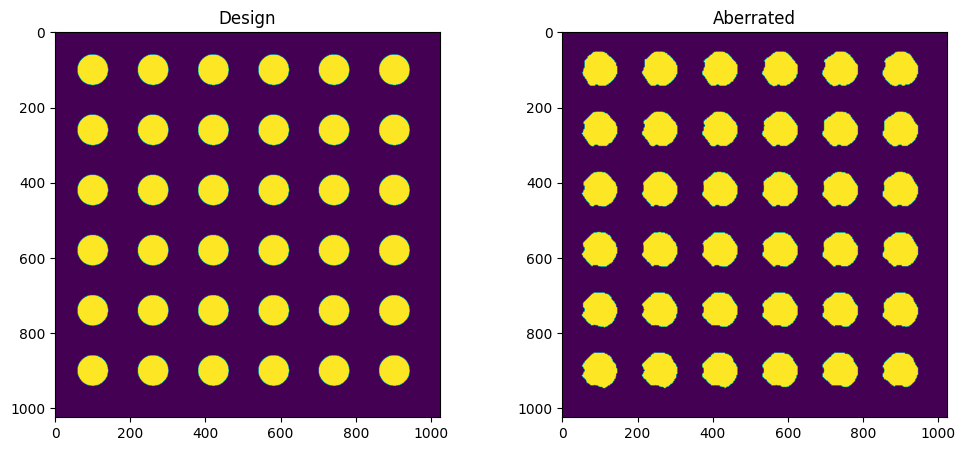

In [5]:
a = dataset(0)

fig = plt.figure(figsize=(12,5))
ax = plt.subplot(1,2,1)
plt.imshow(dataset.intensity_tensor_to_image(a[0][0]))
ax.set_title("Design")
ax = plt.subplot(1,2,2)
plt.imshow(dataset.intensity_tensor_to_image(a[0][1]))
ax.set_title("Aberrated")
print(f"Aberrations: Z={a[1].cpu().numpy()}")
plt.show()

In [16]:
b = [dataset(i) for i in range(len(dataset))]
imgs = torch.stack([sample[0] for sample in b]).to(device)
z_true = torch.stack([sample[1] for sample in b]).to(device)

In [ ]:
model = DualLithoZernikeRegressor("mobilenet_v3_large", num_zernike=6, lr=1e-3)
model.load_state_dict(torch.load('final_dual_model MobileNetV3 1024 v2.pt'))
model.eval().to(device);

/root/anaconda3/envs/SK/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/root/anaconda3/envs/SK/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DualLithoZernikeRegressor(
  (sim): LTSimulator()
  (backbone): MobileNetV3(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(2, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        (2): Hardswish()
      )
      (1): InvertedResidual(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
            (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
          )
          (1): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          )
        )
      )
      (2): InvertedResidual(
        (block): Sequenti

In [13]:
litho_aberr_imgs = imgs[:, 1:]
z_preds, z_rev_preds = model(litho_aberr_imgs)

design_imgs, litho_imgs, aberr_imgs = torch.split(imgs, 1, dim=1) # [B, 3, H, W] -> [B, (1, 1, 1), H, W]

modelled_imgs = model.sim.run_lithosim(design_imgs, zernike_coeffs=z_preds)
reconstructed_imgs = model.sim.run_lithosim(aberr_imgs, zernike_coeffs=z_rev_preds)

/root/anaconda3/envs/SK/lib/python3.11/site-packages/torch/_inductor/compile_fx.py:236: UserWarning: TensorFloat32 tensor cores for float32 matrix multiplication available but not enabled. Consider setting `torch.set_float32_matmul_precision('high')` for better performance.
  warnings.warn(
W0721 11:34:25.970000 11366 site-packages/torch/_inductor/utils.py:1250] [2/1] Not enough SMs to use max_autotune_gemm mode


Aberrations: Z=[0.  1.7 0.  0.  0.  0. ] Preds=[  1.5159457    1.389228     0.3422209  -15.412767   -13.137094
   0.17631452] Inverse=[ 0.82079995  1.6542288   1.0764792   2.6267424  -1.9533502  -2.4685524 ]


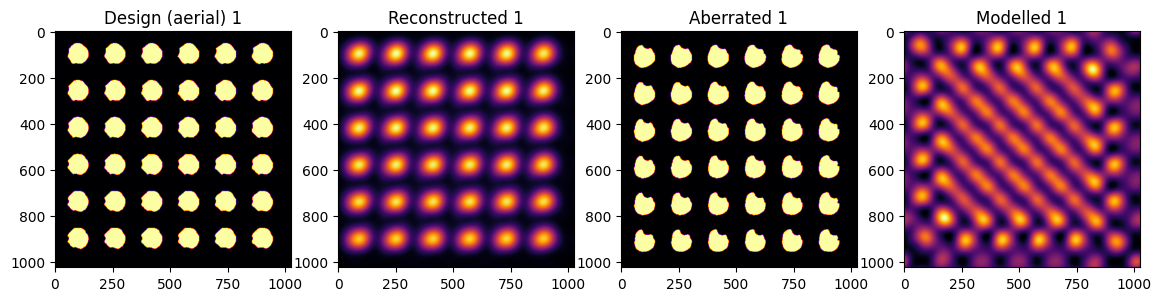

Aberrations: Z=[0.  0.  1.7 0.  0.  0. ] Preds=[ 0.7559508  1.0647411  0.9531573 -9.294541  -9.027014   2.0753653] Inverse=[ 0.3508639  1.1183019  1.1686066  1.5228951 -1.8606062 -1.9775783]


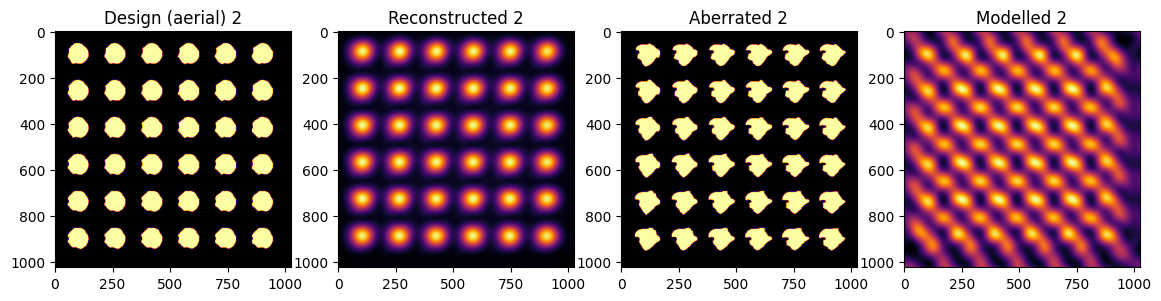

Aberrations: Z=[0. 0. 0. 8. 0. 0.] Preds=[ 0.4632528  -0.13596515  1.389941   -3.7541769  -3.4227283   1.0132296 ] Inverse=[ 0.26424128  0.28728065  0.27227873  0.7414626  -0.6901717  -1.0322679 ]


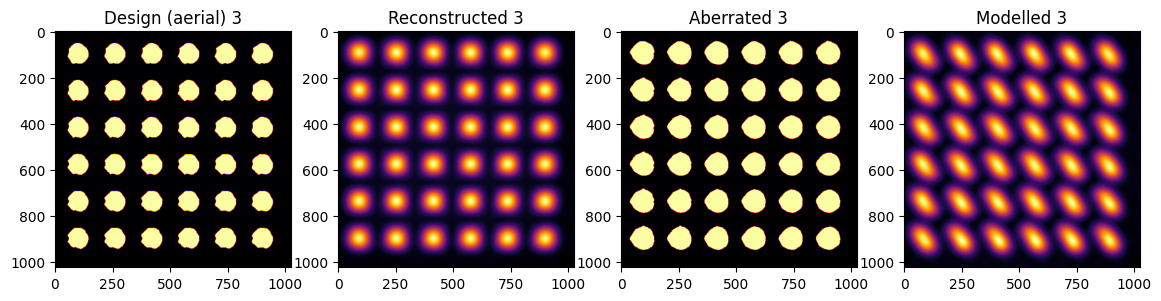

Aberrations: Z=[0.  0.  0.  0.  2.9 0. ] Preds=[ 0.31133583 -0.27499697  1.0748861  -4.4516244  -3.5532515   0.80691314] Inverse=[ 0.24422477  0.40141913  0.2216733   0.44912907 -0.5449828  -0.80335534]


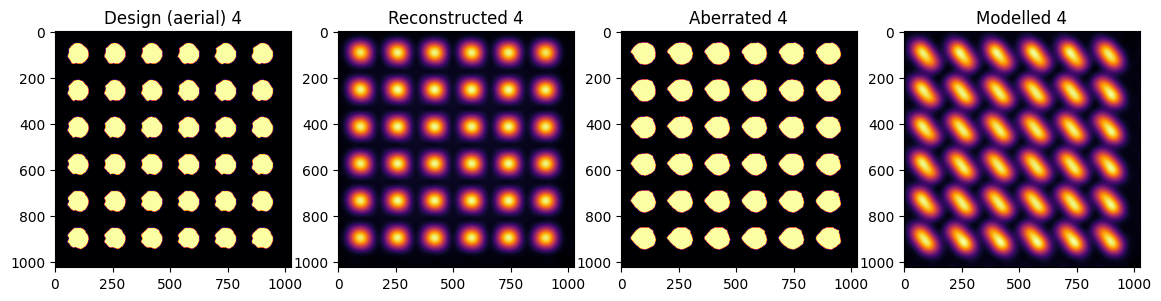

Aberrations: Z=[0. 0. 0. 0. 0. 0.] Preds=[ 0.06006524  1.204902    1.518522   -2.203914   -0.66443425  1.1908871 ] Inverse=[-0.19536763  0.5216057  -0.7285122   1.1713296  -0.40951896 -1.29101   ]


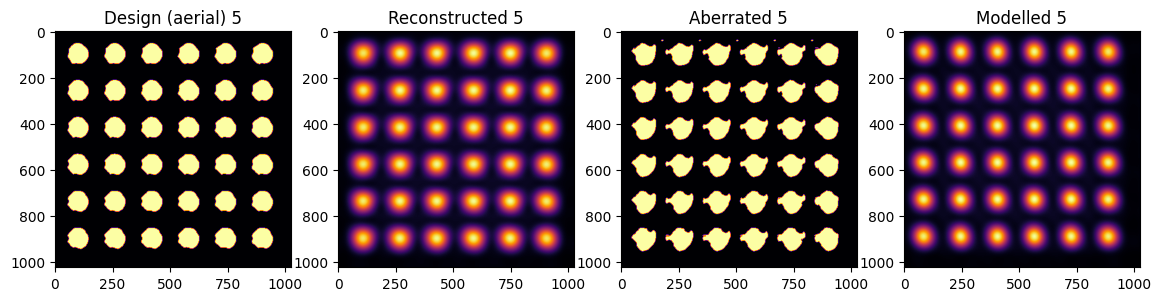

Aberrations: Z=[0. 0. 0. 0. 0. 0.] Preds=[ 0.3947388  3.5496044  4.076083  -3.7661953 -3.7519217  1.5206476] Inverse=[ 0.5293551  0.968368  -1.020375   1.9100801 -1.0931958 -1.3678778]


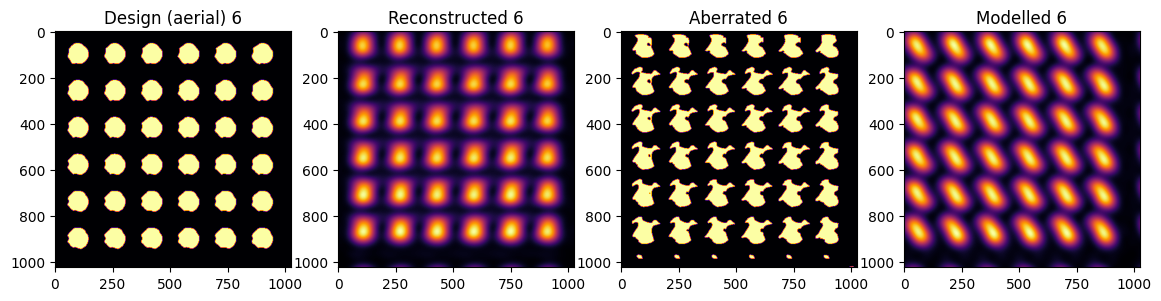

Aberrations: Z=[0. 0. 0. 0. 0. 0.] Preds=[   3.9746523   22.979733   -21.256725  -154.89085    -21.021976
   25.071533 ] Inverse=[  6.619494    3.5534275   8.315563    1.0047238  -7.4165025 -20.44347  ]


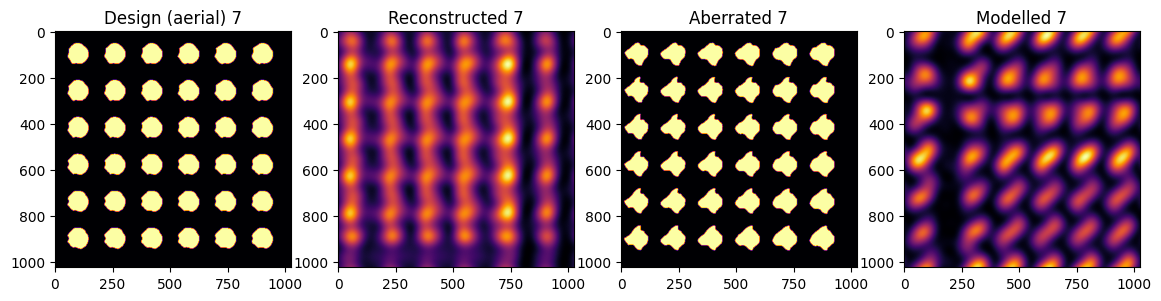

In [17]:
# z = z_preds[:1].clone()
# z_rev = z_rev_preds[:1].clone()
# # z[0,-2] = 1.
# # litho = litho_imgs[:1]
# with torch.autocast(device_type=device.type):
#     aberr = model.sim.run_lithosim(design_imgs[:1], zernike_coeffs=z)
#     reconstr = model.sim.run_lithosim(aberr_imgs[:1], zernike_coeffs=z_rev)
    
# fig = plt.figure(figsize=(14,4))
# ax = plt.subplot(2,3,1)
# # plt.imshow(dataset.intensity_tensor_to_image(litho[0]))
# # # ax.set_title(f"Design {i+1}")
# # ax = plt.subplot(1,2,2)
# # plt.imshow(dataset.intensity_tensor_to_image(aberr[0]))
# plt.imshow(tensor_to_image(litho_imgs[0]))
# # ax.set_title(f"Design {i+1}")
# ax = plt.subplot(1,2,2)
# plt.imshow(tensor_to_image(aberr[0]))
# # ax.set_title(f"Aberrated {i+1}")
# print(z_preds[:1])

for i in range(imgs.shape[0]):

    fig = plt.figure(figsize=(14,4))
    ax = plt.subplot(1,4,1)
    plt.imshow(tensor_to_image(litho_imgs[i]), cmap='inferno')
    ax.set_title(f"Design (aerial) {i+1}")
    ax = plt.subplot(1,4,2)
    plt.imshow(tensor_to_image(reconstructed_imgs[i]), cmap='inferno')
    ax.set_title(f"Reconstructed {i+1}")
    ax = plt.subplot(1,4,3)
    plt.imshow(tensor_to_image(aberr_imgs[i]), cmap='inferno')
    ax.set_title(f"Aberrated {i+1}")
    ax = plt.subplot(1,4,4)
    plt.imshow(tensor_to_image(modelled_imgs[i]), cmap='inferno')
    ax.set_title(f"Modelled {i+1}")
    print(f"Aberrations: Z={z_true[i].cpu().numpy()}", 
          f"Preds={z_preds[i].detach().cpu().numpy()}", 
          f"Inverse={z_rev_preds[i].detach().cpu().numpy()}")
    plt.show()